In [1]:
import pandas as pd
import numpy as np
import scipy 
from scipy import stats
import pathlib
import importlib

In [2]:
from typing import Mapping, Any, Sequence
import copy

In [3]:
import ray
import tensorflow as tf

2024-03-03 16:36:27.163849: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-03 16:36:27.232927: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-03 16:36:27.234652: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-03 16:36:28.860177: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
from daaf import estimator_metrics

In [5]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
files = tf.io.gfile.glob(f"{pathlib.Path.home()}/fs/daaf/exp/evaljob/agg/1709477065/1709481241/metrics/*.parquet")

In [7]:
ds_metrics = ray.data.read_parquet(files)

/home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/datasource/parquet_datasource.py:238: FutureWarning: Passing 'use_legacy_dataset' is deprecated as of pyarrow 15.0.0 and will be removed in a future version.
  pq_ds = pq.ParquetDataset(


Metadata Fetch Progress 0:   0%|          | 0/30 [00:00<?, ?it/s]

2024-03-03 16:36:33,280	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Parquet Files Sample 0:   0%|          | 0/2 [00:00<?, ?it/s]

In [8]:
print(ds_metrics.take(1))

2024-03-03 16:36:43,016	INFO dataset.py:2488 -- Tip: Use `take_batch()` instead of `take() / show()` to return records in pandas or numpy batch format.
2024-03-03 16:36:43,035	INFO set_read_parallelism.py:115 -- Using autodetected parallelism=200 for stage ReadParquet to satisfy DataContext.get_current().min_parallelism=200.
2024-03-03 16:36:43,036	INFO set_read_parallelism.py:122 -- To satisfy the requested parallelism of 200, each read task output is split into 2 smaller blocks.
2024-03-03 16:36:43,039	INFO streaming_executor.py:112 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadParquet] -> LimitOperator[limit=1]
2024-03-03 16:36:43,041	INFO streaming_executor.py:113 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), exclude_resources=ExecutionResources(cpu=0, gpu=0, object_store_memory=0), locality_with_output=False, preserve_order=False, actor_locality_enabled=True, verbose_progress=False)
2024

Running 0:   0%|          | 0/185 [00:00<?, ?it/s]

[{'episode': 2460, 'exp_id': '1709477065-1d235ed3-GridWorld', 'meta': {'algorithm': 'one-step-td', 'discount_factor': 0.99, 'drop_truncated_feedback_episodes': False, 'dyna_prog_state_values': [-929.1377503652075, -933.7570085738876, -937.7520102749545, -938.9053219519477, -936.2975854117375, -928.9401784978877, -915.1006096851953, -891.9404945733174, -855.5139853073156, -802.0011457187513, -732.8160826606584, -668.6744814277542, -958.019007362436, -968.068416982666, -974.4422664102403, -976.561534731791, -974.8370572552099, -968.914872899918, -957.3545139894222, -937.2044845047278, -903.1261332535025, -846.0370518769209, -753.3409474383196, -627.5096269475324, -1011.5182894199983, -1041.1288570169604, -1050.7181043541343, -1053.4781210151048, -1052.9211878248727, -1049.6354135283104, -1042.8386753299492, -1030.2232400584599, -1006.1985520985988, -955.822892317898, -833.3986423365002, -481.82697228316863, -1072.2360257150326, 0.0], 'env': {'args': '{"grid": "oooooooooooo\\noooooooooooo

In [9]:
def as_array(data: Any, dtype):
    if isinstance(data, Sequence):
        return np.array(data, dtype=dtype)
    elif isinstance(data, Mapping) and all([key in data for key in ("data", "shape")]):
        array = np.array(data["data"], dtype=dtype)
        return np.reshape(array, newshape=data["shape"])
    raise ValueError(f"Unsupported value: {data}")
        

In [10]:
# importlib.reload(evalmetrics)

In [11]:
df_metrics = ds_metrics.to_pandas()

Read progress 0:   0%|          | 0/185 [00:00<?, ?it/s]

/home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/_internal/arrow_block.py:148: FutureWarning: promote has been superseded by promote_options='default'.
  return transform_pyarrow.concat(tables)


In [12]:
df_metrics

,episode,exp_id,meta,state_values,over_states_then_runs,over_runs_then_states,policy_metrics
0,2460,1709477065-1d235ed3-GridWorld,"{'algorithm': 'one-step-td', 'discount_factor'...","{'data': [-5873.598581233445, -5892.8391860023...","{'mae': {'mean': 4950.179820974168, 'std': 22....","{'mae': {'mean': 4950.179820974168, 'std': 819...","{'pi_equi': {'mean': 0.5701754385964911, 'std'..."
1,2460,1709477065-1ad11ca6-RedGreenSeq,"{'algorithm': 'nstep-td', 'discount_factor': 0...","{'data': [-21.813462776396292, -19.31227414953...","{'mae': {'mean': 5.197694483311027, 'std': 0.4...","{'mae': {'mean': 5.197694483311027, 'std': 3.8...","{'pi_equi': {'mean': 1.0, 'std': 0.0}}"
2,2460,1709477065-24b09dc8-ABCSeq,"{'algorithm': 'nstep-td', 'discount_factor': 0...","{'data': [-62.18519900723752, -59.740533778053...","{'mae': {'mean': 175.58182499878455, 'std': 2....","{'mae': {'mean': 175.58182499878455, 'std': 96...","{'pi_equi': {'mean': 0.9696969696969697, 'std'..."
3,2460,1709477065-24ab94d4-IceWorld,"{'algorithm': 'one-step-td', 'discount_factor'...","{'data': [-35.692500998846164, -34.64434063827...","{'mae': {'mean': 0.8144225142390757, 'std': 0....","{'mae': {'mean': 0.8144225142390756, 'std': 1....","{'pi_equi': {'mean': 0.9166666666666666, 'std'..."
4,2460,1709477065-2f9eb398-ABCSeq,"{'algorithm': 'one-step-td', 'discount_factor'...","{'data': [-91.91144576422442, -80.937805757721...","{'mae': {'mean': 260.4332989995312, 'std': 1.0...","{'mae': {'mean': 260.4332989995312, 'std': 159...","{'pi_equi': {'mean': 1.0, 'std': 0.0}}"
...,...,...,...,...,...,...,...
71995,1440,1709477065-fe551c45-ABCSeq,"{'algorithm': 'nstep-td', 'discount_factor': 1...","{'data': [-109.23214913983851, -96.61670559793...","{'mae': {'mean': 243.15414631793772, 'std': 1....","{'mae': {'mean': 243.15414631793772, 'std': 15...","{'pi_equi': {'mean': 1.0, 'std': 0.0}}"
71996,1440,1709477065-fc068753-IceWorld,"{'algorithm': 'one-step-td', 'discount_factor'...","{'data': [-19.937681842224656, -16.70770194519...","{'mae': {'mean': 17.561037411546806, 'std': 0....","{'mae': {'mean': 17.561037411546806, 'std': 12...","{'pi_equi': {'mean': 0.625, 'std': 0.088388347..."
71997,1440,1709477065-fcaa7651-TowerOfHanoi,"{'algorithm': 'nstep-td', 'discount_factor': 0...","{'data': [-99.9630639865872, -99.3310583107378...","{'mae': {'mean': 1.1469732216627948, 'std': 0....","{'mae': {'mean': 1.1469732216627948, 'std': 3....","{'pi_equi': {'mean': 0.4773662551440329, 'std'..."
71998,1440,1709477065-f7b71e98-TowerOfHanoi,"{'algorithm': 'one-step-td', 'discount_factor'...","{'data': [-4214.840076828879, -3026.4167354121...","{'mae': {'mean': 3781.2266327165958, 'std': 51...","{'mae': {'mean': 3781.2266327165958, 'std': 98...","{'pi_equi': {'mean': 0.8545953360768176, 'std'..."


In [13]:
df_metrics.iloc[0]["meta"]

{'algorithm': 'one-step-td',
 'discount_factor': 0.99,
 'drop_truncated_feedback_episodes': False,
 'dyna_prog_state_values': array([ -929.13775037,  -933.75700857,  -937.75201027,  -938.90532195,
         -936.29758541,  -928.9401785 ,  -915.10060969,  -891.94049457,
         -855.51398531,  -802.00114572,  -732.81608266,  -668.67448143,
         -958.01900736,  -968.06841698,  -974.44226641,  -976.56153473,
         -974.83705726,  -968.9148729 ,  -957.35451399,  -937.2044845 ,
         -903.12613325,  -846.03705188,  -753.34094744,  -627.50962695,
        -1011.51828942, -1041.12885702, -1050.71810435, -1053.47812102,
        -1052.92118782, -1049.63541353, -1042.83867533, -1030.22324006,
        -1006.1985521 ,  -955.82289232,  -833.39864234,  -481.82697228,
        -1072.23602572,     0.        ]),
 'env': {'args': '{"grid": "oooooooooooo\\noooooooooooo\\noooooooooooo\\nsxxxxxxxxxxg"}',
  'level': 'P3VJZBIJ7PNUOFG2SCF532NH5AQ6NOBZEZ6UZNZ7D3AU3GQZSLKURMS2SRPEUF6O65F3ETJXEFNTR3UYS73

In [14]:
def get_distinct_envs(df_data: pd.DataFrame):
    envs = {}
    for row in pd.DataFrame(df_metrics["meta"]).to_dict("records"):
        env = row["meta"]["env"]
        key = (env["name"], env["level"])
        envs[key] = env["args"]
    return envs

In [15]:
envs = get_distinct_envs(df_metrics)

In [16]:
envs

{('GridWorld',
  'P3VJZBIJ7PNUOFG2SCF532NH5AQ6NOBZEZ6UZNZ7D3AU3GQZSLKURMS2SRPEUF6O65F3ETJXEFNTR3UYS73TUCIIU3YIONXHAR6WE5A='): '{"grid": "oooooooooooo\\noooooooooooo\\noooooooooooo\\nsxxxxxxxxxxg"}',
 ('RedGreenSeq',
  'NNLHYJFTC5ENMMDZWRNQ37B6VVDXQ7WHB5EJOPXYZFLMJEZOYLTSLB4ID4WHQG57XQPNUHGZCFDCWHYGXWSBW7FBWYRZGAGBW4J7MEQ='): '{"cure": ["red", "green", "wait", "green", "red", "red", "green", "wait"]}',
 ('ABCSeq', '10'): '{"length": 10, "distance_penalty": false}',
 ('IceWorld',
  '4KE3ASUFQGGUPERSDDRQAZAMA46CI2CMCJHGWJ7MRNI64JMEBETNDXFFPYWTQJF46S5BJ4NXXCHNMJSLII3ROYXI76DFOC3VAABGNVA='): '{"map_name": "4x4"}',
 ('ABCSeq', '7'): '{"length": 7, "distance_penalty": false}',
 ('IceWorld',
  'JKNDNWGM45FELU53ZLLVJEPY2SFZBCX54PSACOQOFMTDUAK5VNQ4KE45QZINGYFU5GR6D7F3GJMW7EC4TAY5PHCYRN5GPGP7YNACHEI='): '{"map_name": "8x8"}',
 ('TowerOfHanoi', '4'): '{"num_disks": 4}',
 ('FrozenLake-v1',
  'U75ZLQLLXYRFQE5KOJJGNVQZGQ65U5RVVN3ZV5F4UNYQVK6NGTAAU62O2DKMOEGACNNUQOSWGYYOV7LQHK7GAWG2CL3U3RZJFIEIB5I='):

In [17]:
# choose: environment (name, args); algorithm -> (MC, TD-0, n-step); discount_factor -> (0.9, 1.0); drop-truncated -> (false, true)
# args: metric
# result: plot mean chosen at every step for every policy_type x traj_mapping_method x reward period combination

In [18]:
def plot_eval_result(
    env: str,
    level: str,
    discount_factor: float,
    drop_truncated: bool,
    metric_family: str,
    metric_col: str,
    df_data: pd.DataFrame,
    max_episode: int = 500
):
    def meta_filter(meta: Mapping[str, Any]):
        return (
            meta["env"]["name"] == env and 
            meta["env"]["level"] == level and
            meta["discount_factor"] == discount_factor and
            meta["drop_truncated_feedback_episodes"] == drop_truncated
        )
    meta_mask = df_data["meta"].apply(meta_filter)
    episode_mask = df_data["episode"] <= max_episode
    methods = sorted(df_data["meta"].apply(lambda meta: meta["traj_mapping_method"]).unique())
    markers = {
        method: idx for idx, method in enumerate(methods)
    }
    df_result = copy.deepcopy(df_data[(meta_mask & episode_mask)])
    for key in df_result.iloc[0]["meta"].keys():
        df_result[key] = df_result["meta"].apply(lambda meta: meta[key])
    del df_result["meta"]
    del df_result["state_values"]
    df_result[metric_col] = df_result[metric_family].apply(
        lambda metrics: metrics[metric_col]["mean"]
    )
    # baseline - reward period = 1
    # replicate it with every other reward
    # delete reward = 1
    reward_periods = df_result["reward_period"].unique()
    df_baseline = df_result[df_result["reward_period"] == 1]
    df_result = df_result[df_result["reward_period"] != 1]
    baseline_dfs = []
    for reward_period in reward_periods:
        if reward_period > 1:
            df_baseline_rp = copy.deepcopy(df_baseline)
            df_baseline_rp["reward_period"] = reward_period
            baseline_dfs.append(df_baseline_rp)
    df_result = pd.concat(baseline_dfs + [df_result], axis=0)
    df_result = df_result.sort_values(["algorithm", "reward_period"])
    
    return sns.relplot(
        data=df_result, x="episode", y=metric_col,
        col="algorithm", row="reward_period",
        hue="traj_mapping_method", 
        style="traj_mapping_method",
        kind="line",
        hue_order=methods,
        markers=markers
    )

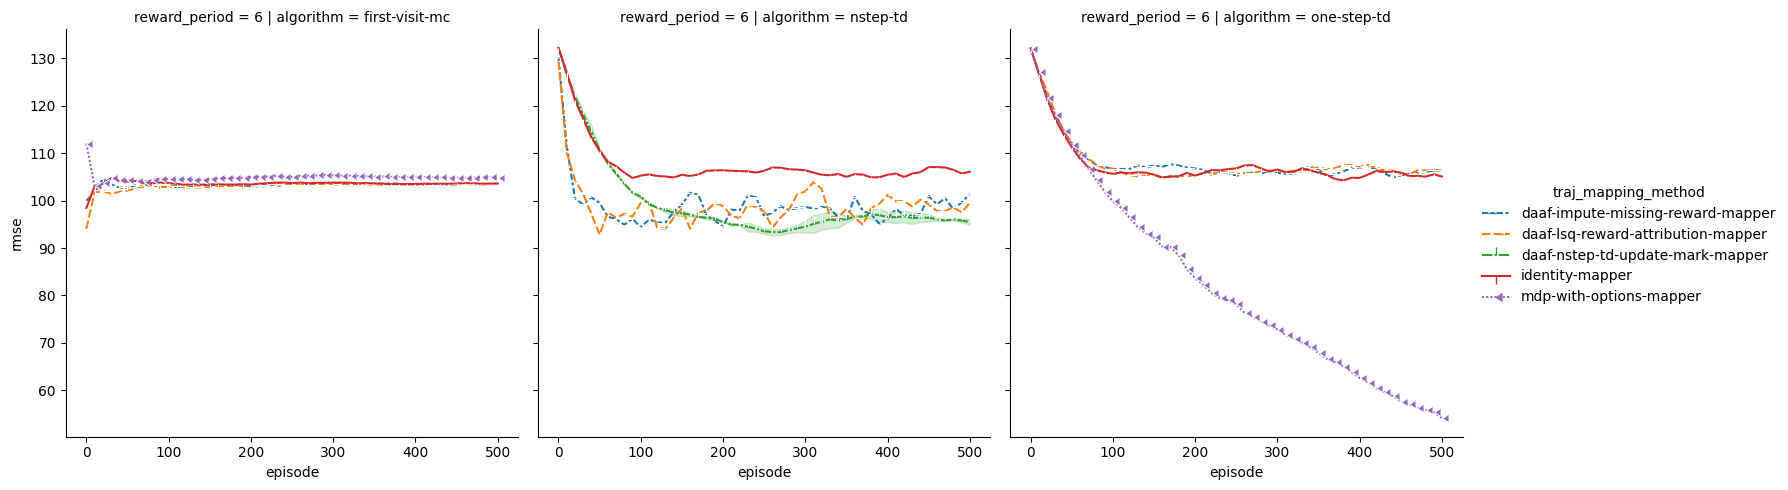

In [19]:
plot_eval_result(
    env="ABCSeq",
    level="7",
    discount_factor=1.0,
    drop_truncated=False,
    metric_family="over_states_then_runs",
    metric_col="rmse",
    df_data=df_metrics
)


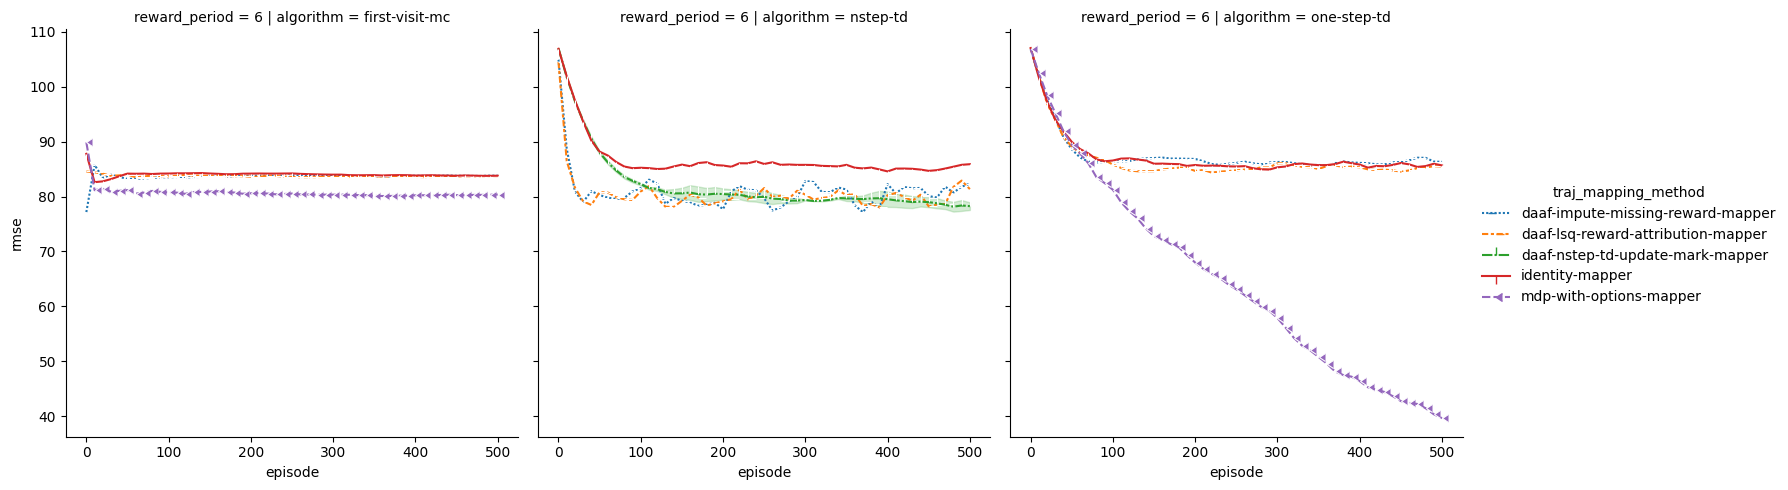

In [20]:
plot_eval_result(
    env="ABCSeq",
    level="7",
    discount_factor=0.99,
    drop_truncated=False,
    metric_family="over_states_then_runs",
    metric_col="rmse",
    df_data=df_metrics
)


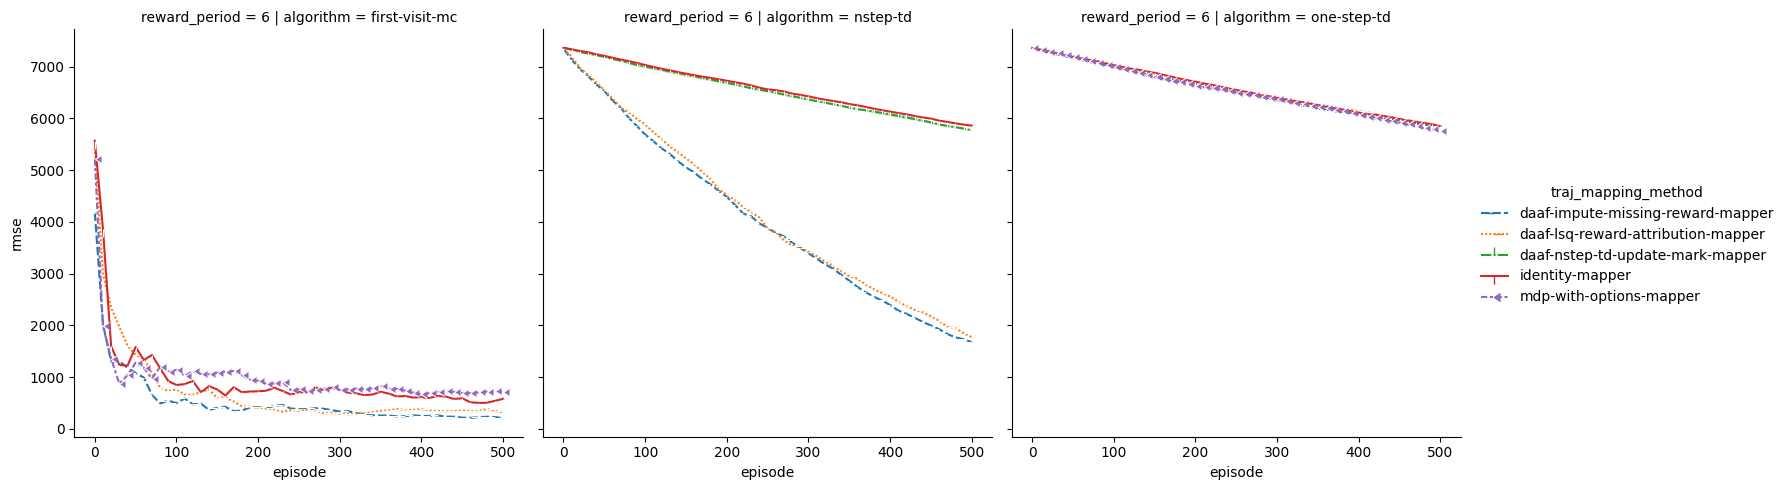

In [21]:
plot_eval_result(
    env="TowerOfHanoi",
    level="5",
    discount_factor=1.0,
    drop_truncated=False,
    metric_family="over_states_then_runs",
    metric_col="rmse",
    df_data=df_metrics
)


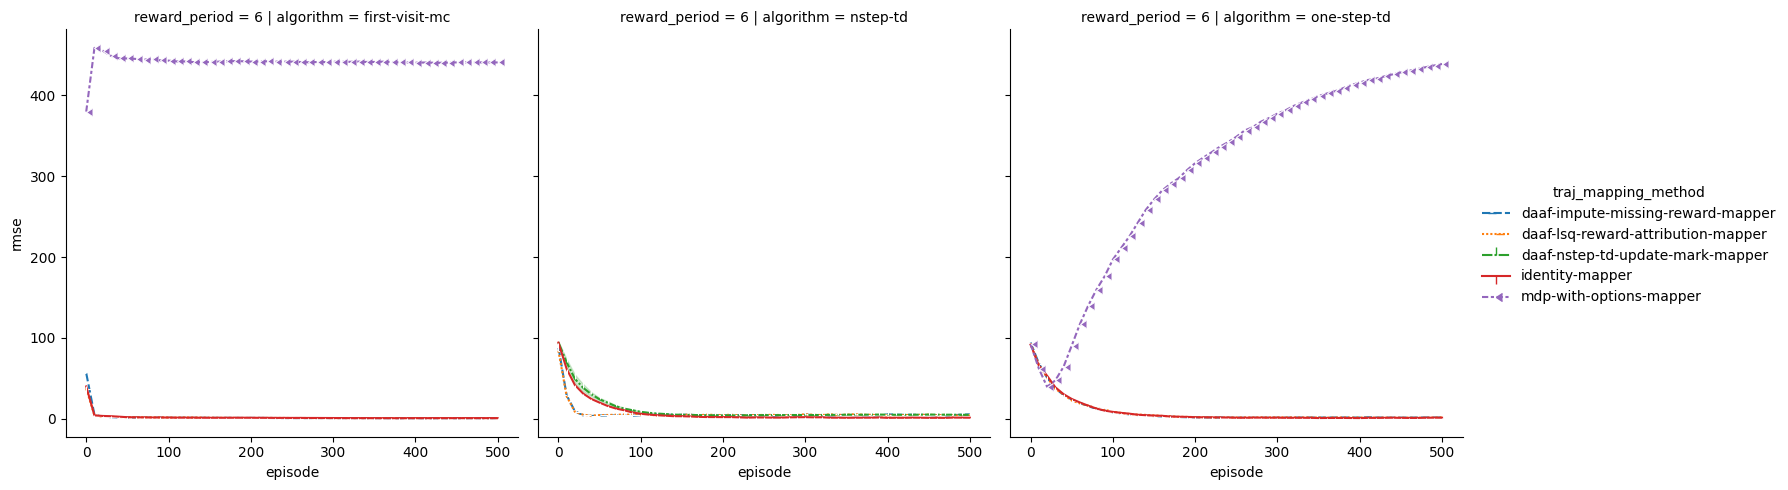

In [22]:
plot_eval_result(
    env="TowerOfHanoi",
    level="5",
    discount_factor=0.99,
    drop_truncated=False,
    metric_family="over_states_then_runs",
    metric_col="rmse",
    df_data=df_metrics
)


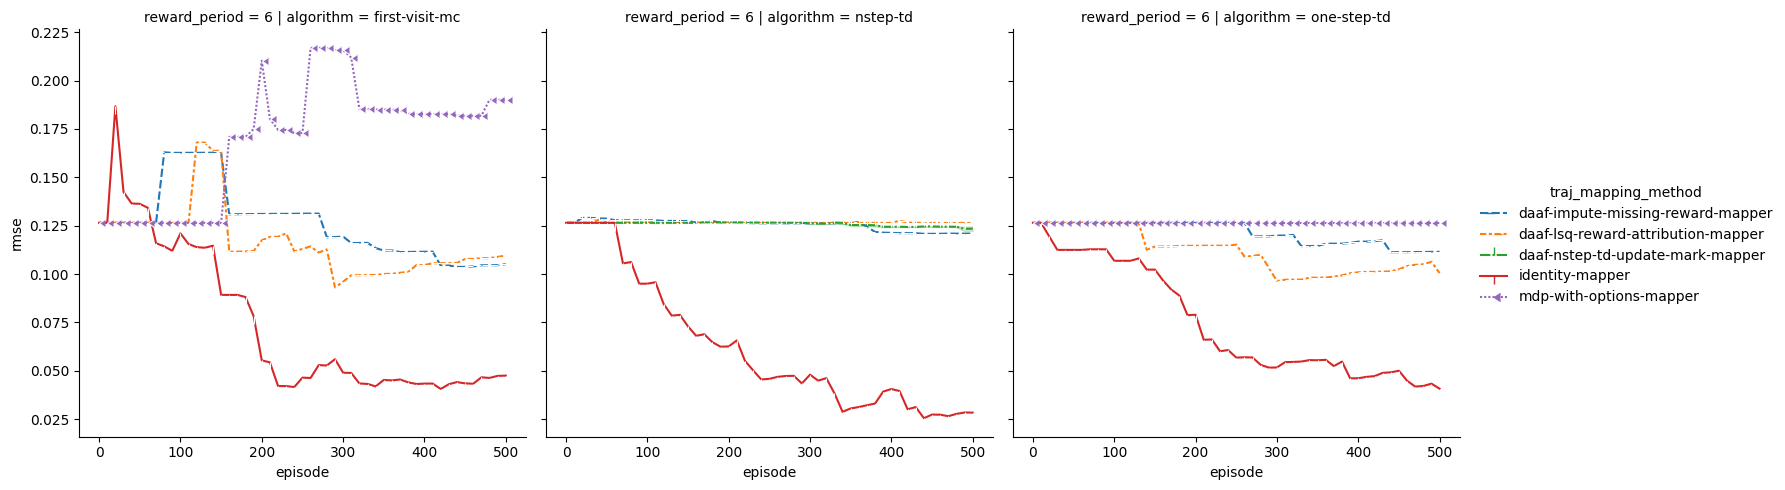

In [23]:
plot_eval_result(
    env="FrozenLake-v1",
    level="U75ZLQLLXYRFQE5KOJJGNVQZGQ65U5RVVN3ZV5F4UNYQVK6NGTAAU62O2DKMOEGACNNUQOSWGYYOV7LQHK7GAWG2CL3U3RZJFIEIB5I=",
    discount_factor=1.0,
    drop_truncated=False,
    metric_family="over_states_then_runs",
    metric_col="rmse",
    df_data=df_metrics
)


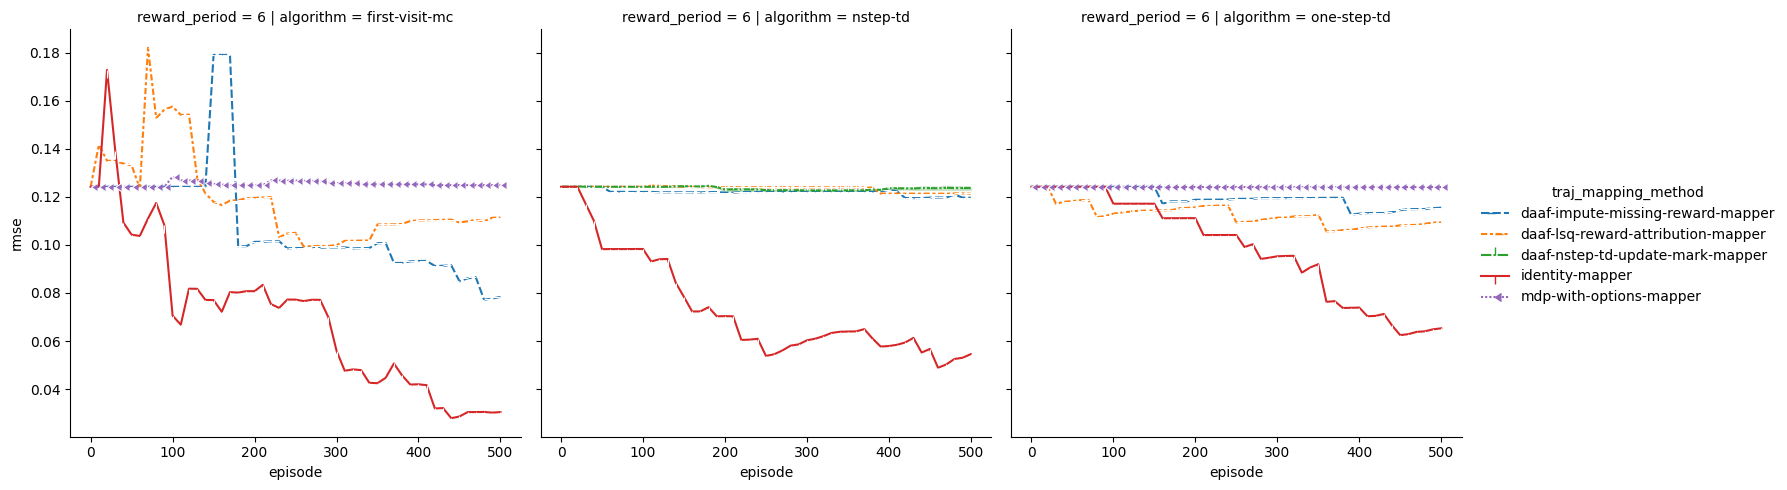

In [24]:
plot_eval_result(
    env="FrozenLake-v1",
    level="U75ZLQLLXYRFQE5KOJJGNVQZGQ65U5RVVN3ZV5F4UNYQVK6NGTAAU62O2DKMOEGACNNUQOSWGYYOV7LQHK7GAWG2CL3U3RZJFIEIB5I=",
    discount_factor=0.99,
    drop_truncated=False,
    metric_family="over_states_then_runs",
    metric_col="rmse",
    df_data=df_metrics
)


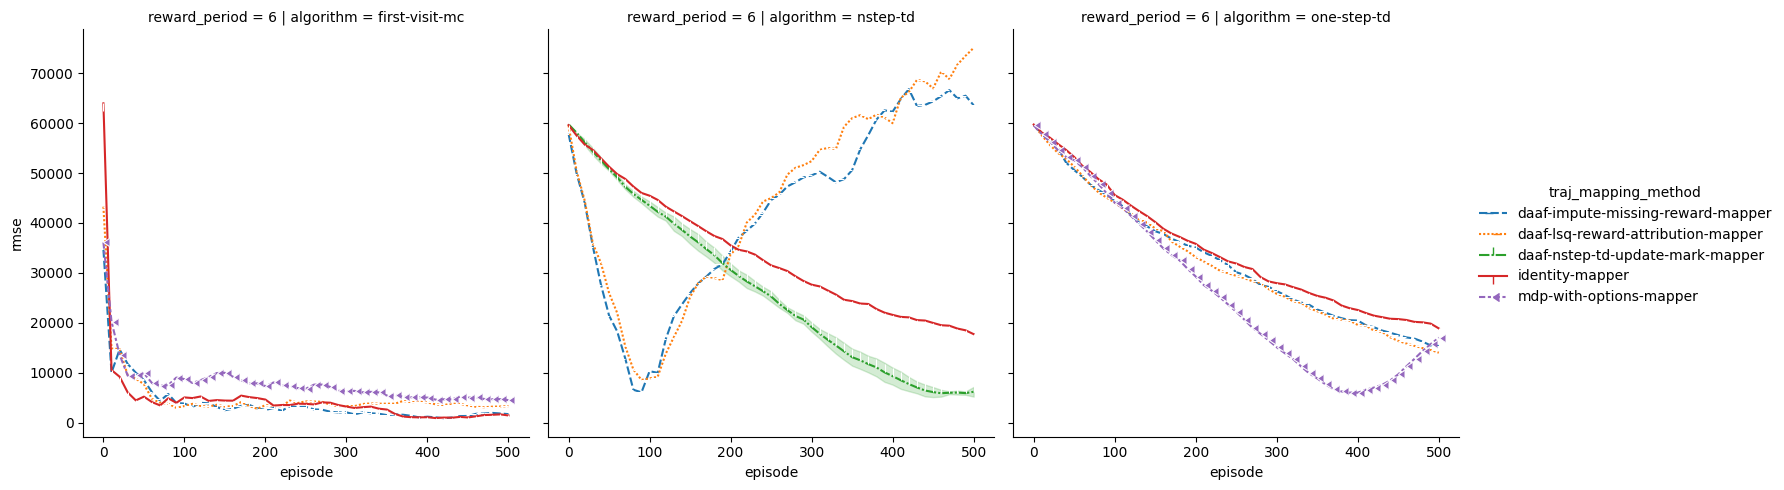

In [25]:
plot_eval_result(
    env="GridWorld",
    level="P3VJZBIJ7PNUOFG2SCF532NH5AQ6NOBZEZ6UZNZ7D3AU3GQZSLKURMS2SRPEUF6O65F3ETJXEFNTR3UYS73TUCIIU3YIONXHAR6WE5A=",
    discount_factor=1.0,
    drop_truncated=False,
    metric_family="over_states_then_runs",
    metric_col="rmse",
    df_data=df_metrics
)


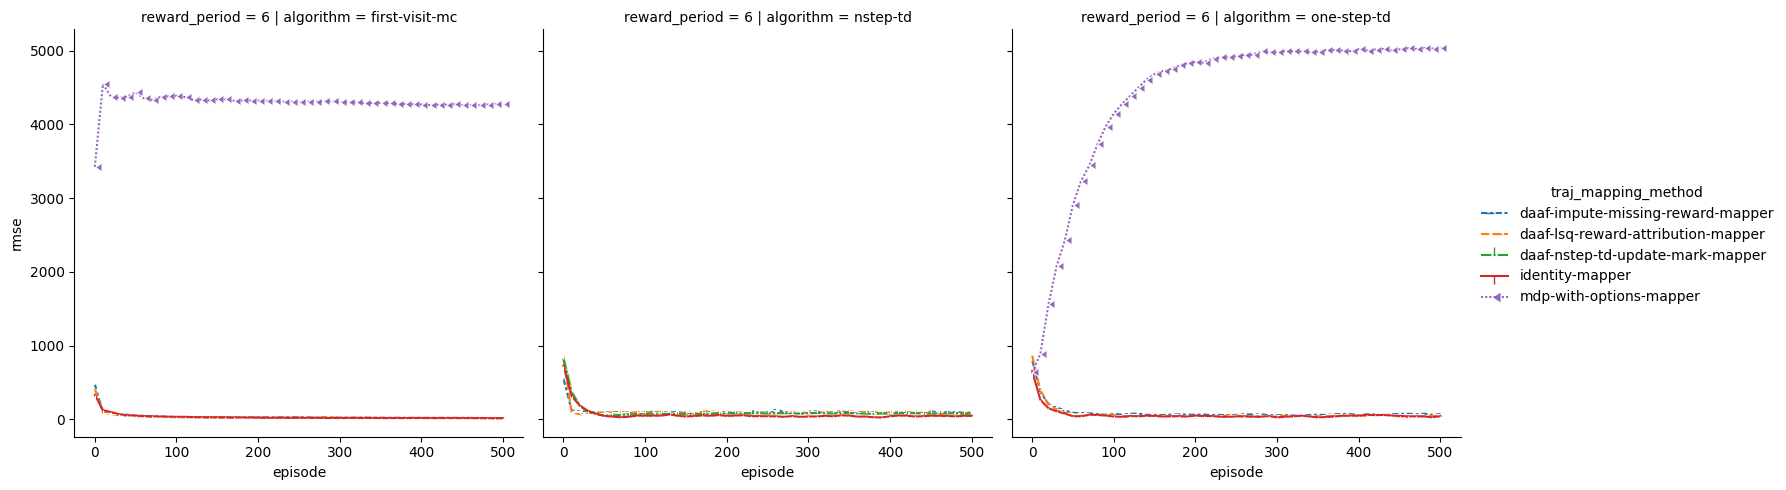

In [26]:
plot_eval_result(
    env="GridWorld",
    level="P3VJZBIJ7PNUOFG2SCF532NH5AQ6NOBZEZ6UZNZ7D3AU3GQZSLKURMS2SRPEUF6O65F3ETJXEFNTR3UYS73TUCIIU3YIONXHAR6WE5A=",
    discount_factor=0.99,
    drop_truncated=False,
    metric_family="over_states_then_runs",
    metric_col="rmse",
    df_data=df_metrics
)


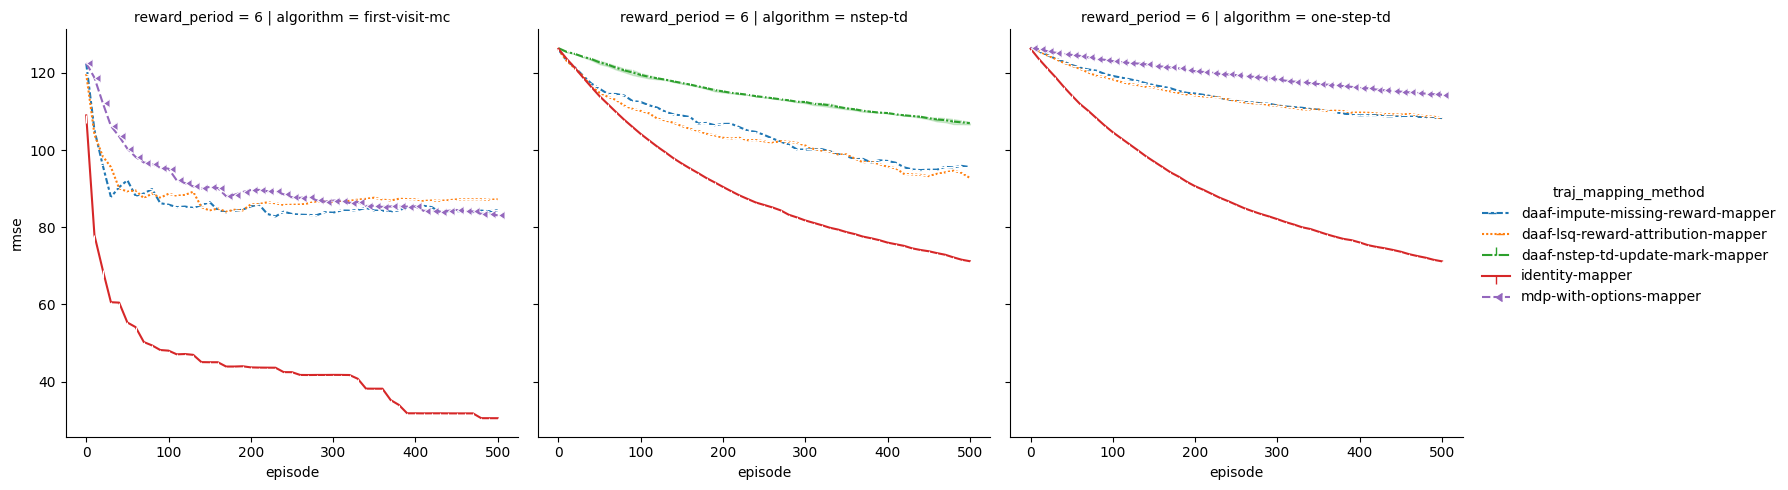

In [27]:
plot_eval_result(
    env="IceWorld",
    level="JKNDNWGM45FELU53ZLLVJEPY2SFZBCX54PSACOQOFMTDUAK5VNQ4KE45QZINGYFU5GR6D7F3GJMW7EC4TAY5PHCYRN5GPGP7YNACHEI=",
    discount_factor=1.0,
    drop_truncated=False,
    metric_family="over_states_then_runs",
    metric_col="rmse",
    df_data=df_metrics
)


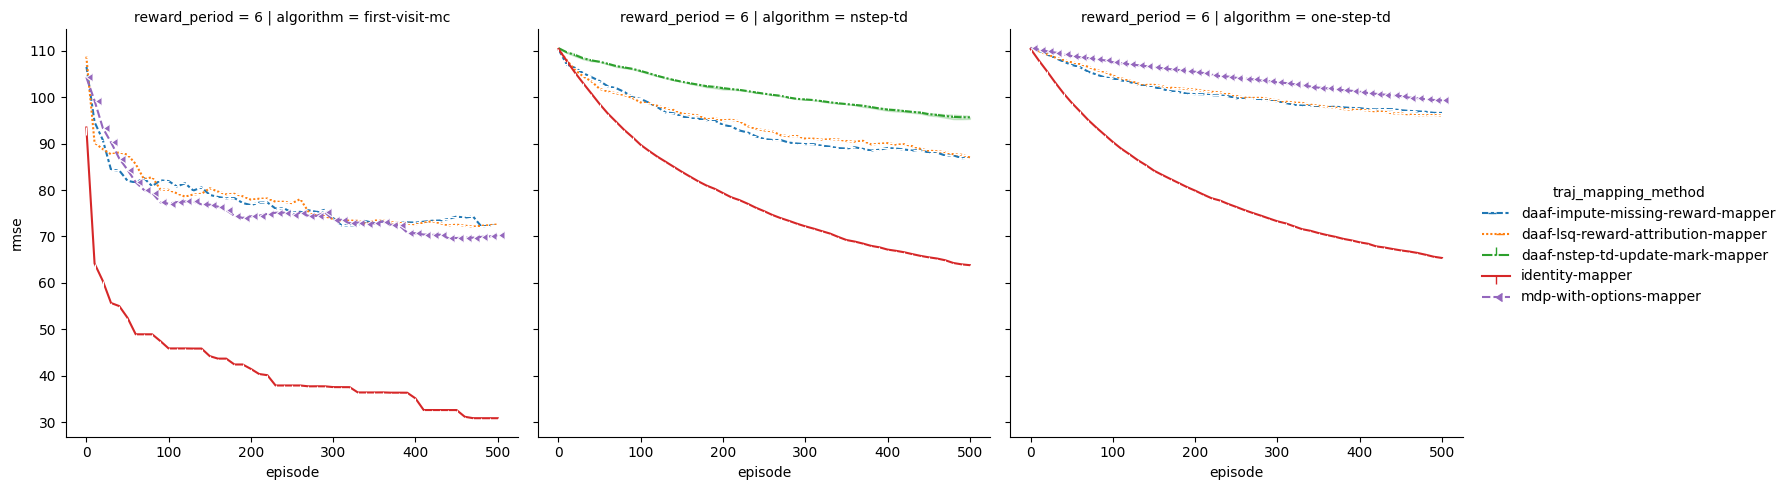

In [28]:
plot_eval_result(
    env="IceWorld",
    level="JKNDNWGM45FELU53ZLLVJEPY2SFZBCX54PSACOQOFMTDUAK5VNQ4KE45QZINGYFU5GR6D7F3GJMW7EC4TAY5PHCYRN5GPGP7YNACHEI=",
    discount_factor=0.99,
    drop_truncated=False,
    metric_family="over_states_then_runs",
    metric_col="rmse",
    df_data=df_metrics
)


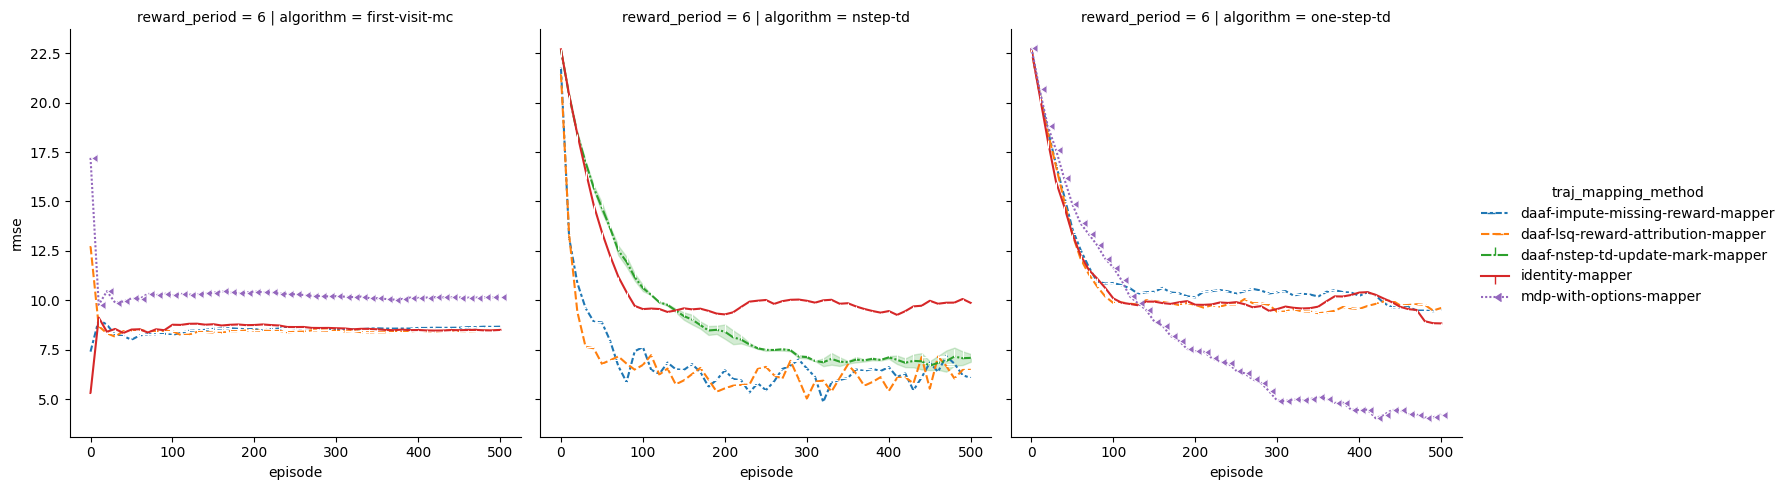

In [29]:
plot_eval_result(
    env="RedGreenSeq",
    level="NNLHYJFTC5ENMMDZWRNQ37B6VVDXQ7WHB5EJOPXYZFLMJEZOYLTSLB4ID4WHQG57XQPNUHGZCFDCWHYGXWSBW7FBWYRZGAGBW4J7MEQ=",
    discount_factor=1.0,
    drop_truncated=False,
    metric_family="over_states_then_runs",
    metric_col="rmse",
    df_data=df_metrics
)


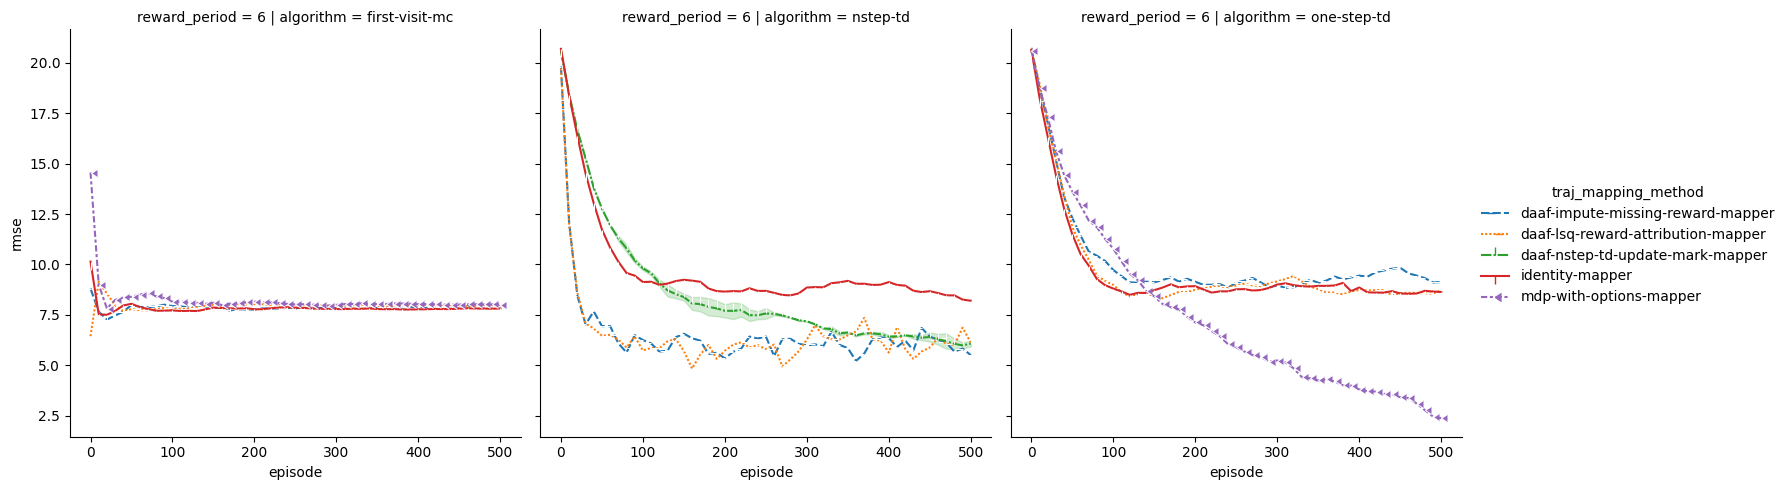

In [30]:
plot_eval_result(
    env="RedGreenSeq",
    level="NNLHYJFTC5ENMMDZWRNQ37B6VVDXQ7WHB5EJOPXYZFLMJEZOYLTSLB4ID4WHQG57XQPNUHGZCFDCWHYGXWSBW7FBWYRZGAGBW4J7MEQ=",
    discount_factor=0.99,
    drop_truncated=False,
    metric_family="over_states_then_runs",
    metric_col="rmse",
    df_data=df_metrics
)
